In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


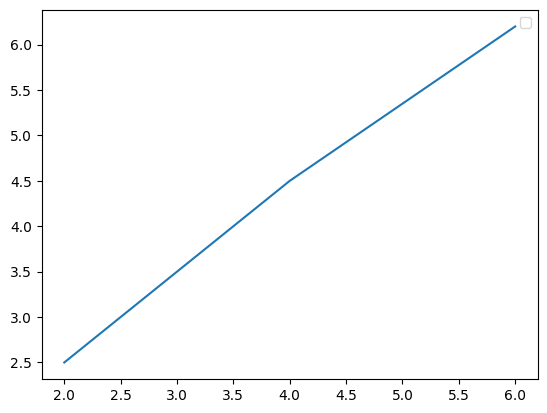

In [ ]:
x=[2,3,4,6]
y=[2.5,3.5,4.5,6.2]
plt.plot(x,y)
plt.legend()

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
torch.manual_seed(0)

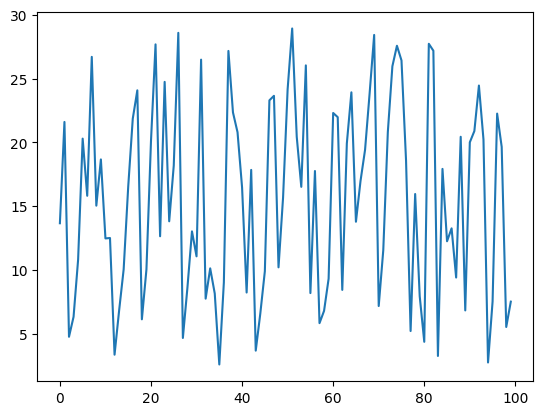

In [ ]:
N=100
D=1
x=torch.rand(N,1)*5
y_true=5.3*x + 2.6
y_obs=y_true +0.8*torch.randn(N,D)
plt.plot(y_obs)

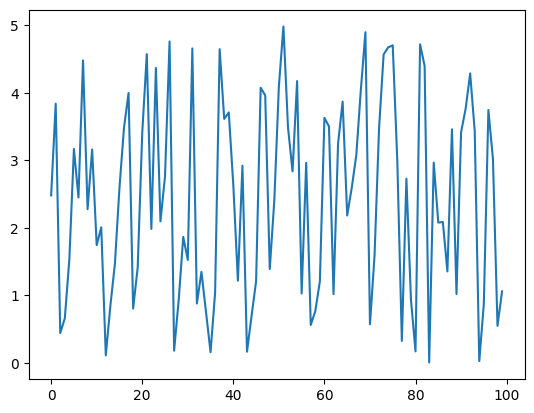

In [ ]:
plt.plot(x)

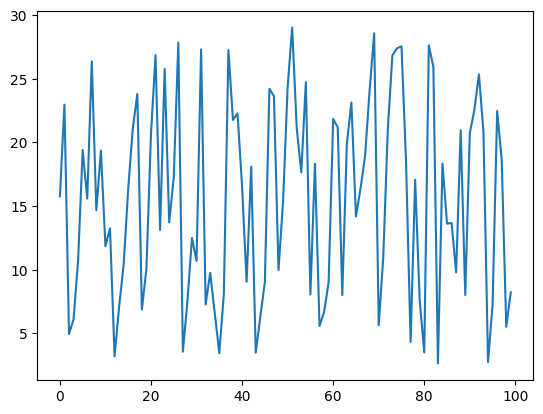

In [ ]:
plt.plot(y_true)

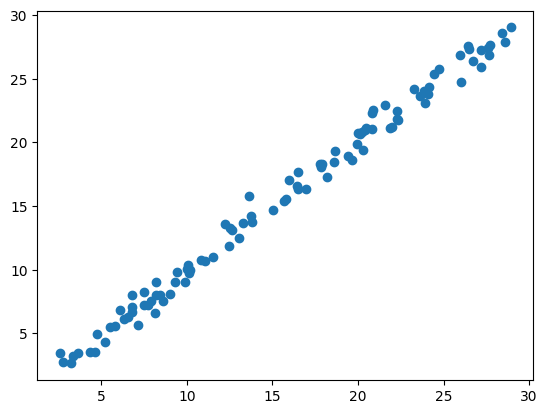

In [ ]:
scatter(y_obs,y_true)

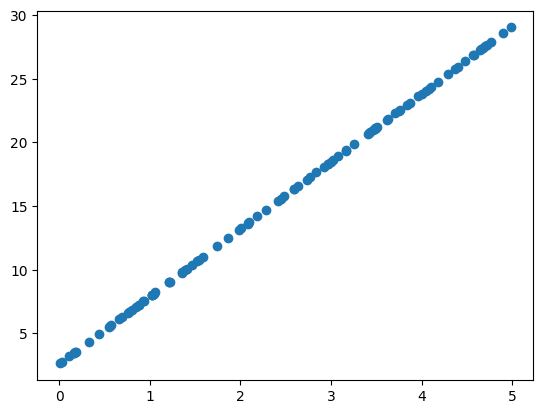

In [ ]:
scatter(x,y_true)

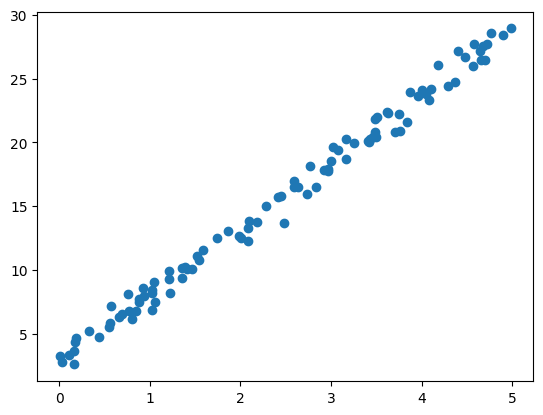

In [ ]:
scatter(x, y_obs)

In [ ]:
y_obs

tensor([[13.6601],
        [21.6007],
        [ 4.7621],
        [ 6.3228],
        [10.8053],
        [20.2937],
        [15.8133],
        [26.7032],
        [15.0397],
        [18.6638],
        [12.4707],
        [12.5041],
        [ 3.3568],
        [ 6.8080],
        [10.0450],
        [16.5272],
        [21.8582],
        [24.0796],
        [ 6.1301],
        [10.0352],
        [20.1014],
        [27.6820],
        [12.6402],
        [24.7421],
        [13.8134],
        [18.1839],
        [28.5863],
        [ 4.6682],
        [ 8.6087],
        [13.0233],
        [11.0664],
        [26.4850],
        [ 7.7499],
        [10.1241],
        [ 8.1535],
        [ 2.5901],
        [ 9.0277],
        [27.1678],
        [22.3462],
        [20.7957],
        [16.4652],
        [ 8.2301],
        [17.8416],
        [ 3.6752],
        [ 6.5777],
        [ 9.9002],
        [23.2957],
        [23.6488],
        [10.2046],
        [15.6812],
        [24.1633],
        [28.9279],
        [20.

In [ ]:
x

tensor([[2.4813],
        [3.8411],
        [0.4424],
        [0.6602],
        [1.5371],
        [3.1704],
        [2.4505],
        [4.4822],
        [2.2781],
        [3.1615],
        [1.7445],
        [2.0086],
        [0.1116],
        [0.8443],
        [1.4694],
        [2.5926],
        [3.4883],
        [4.0001],
        [0.8051],
        [1.4113],
        [3.4080],
        [4.5760],
        [1.9855],
        [4.3708],
        [2.0970],
        [2.7645],
        [4.7637],
        [0.1808],
        [0.9262],
        [1.8671],
        [1.5255],
        [4.6600],
        [0.8796],
        [1.3492],
        [0.7534],
        [0.1586],
        [1.0406],
        [4.6490],
        [3.6155],
        [3.7117],
        [2.6315],
        [1.2183],
        [2.9230],
        [0.1658],
        [0.6936],
        [1.2112],
        [4.0773],
        [3.9658],
        [1.3913],
        [2.4098],
        [4.0989],
        [4.9853],
        [3.4922],
        [2.8377],
        [4.1762],
        [1

In [ ]:
y_true

tensor([[15.7508],
        [22.9579],
        [ 4.9447],
        [ 6.0988],
        [10.7467],
        [19.4031],
        [15.5875],
        [26.3558],
        [14.6741],
        [19.3561],
        [11.8457],
        [13.2455],
        [ 3.1916],
        [ 7.0748],
        [10.3880],
        [16.3408],
        [21.0882],
        [23.8003],
        [ 6.8673],
        [10.0801],
        [20.6626],
        [26.8526],
        [13.1231],
        [25.7651],
        [13.7143],
        [17.2520],
        [27.8476],
        [ 3.5584],
        [ 7.5086],
        [12.4956],
        [10.6852],
        [27.2980],
        [ 7.2616],
        [ 9.7506],
        [ 6.5930],
        [ 3.4406],
        [ 8.1154],
        [27.2397],
        [21.7624],
        [22.2719],
        [16.5468],
        [ 9.0569],
        [18.0917],
        [ 3.4785],
        [ 6.2760],
        [ 9.0192],
        [24.2099],
        [23.6188],
        [ 9.9737],
        [15.3719],
        [24.3242],
        [29.0223],
        [21.

In [ ]:
w=torch.randn(D, requires_grad=True)
b=torch.randn(1, requires_grad=True)

In [ ]:
def predict(X):
    return torch.unsqueeze(torch.matmul(X,w)+b,1)

def mse_loss(y_pred, y_true):
    return torch.mean((y_pred-y_true)**2)

def regularized_loss(y_pred, y_true, reg_coeff=0):
    return mse_loss(y_pred, y_true)+reg_coeff * (w**2).sum()

In [ ]:
def zero_gradients(*params):
    for p in params:
      p.grad.zero_()

In [ ]:
nb_epochs=500
lr=0.01
regularization_coeff = 1e-4

In [ ]:
losses = []

for epoch in range(nb_epochs):

    # make prediction
    y_pred = predict(x)

    # compute the loss
    loss = regularized_loss(y_pred, y_obs, regularization_coeff)

    # reverse mode autodiff
    loss.backward()

    # gradient descent (don't track gradients)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # set gradients to zero so they don't accumulate
    zero_gradients(w, b)

    # save loss for plotting
    losses.append(loss.item())

In [ ]:
print(f'w={w[0]:0.3f} b={b[0]:0.4f}')

w=5.238 b=2.7105


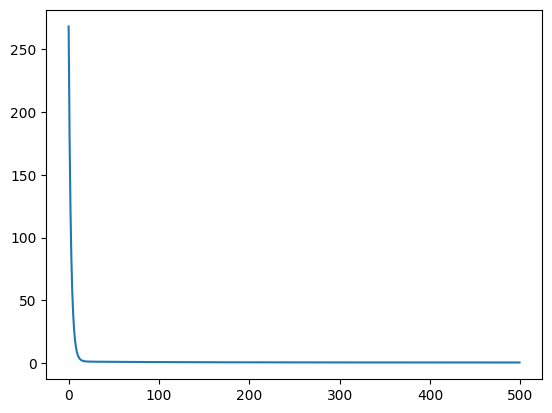

In [ ]:
plot(losses)

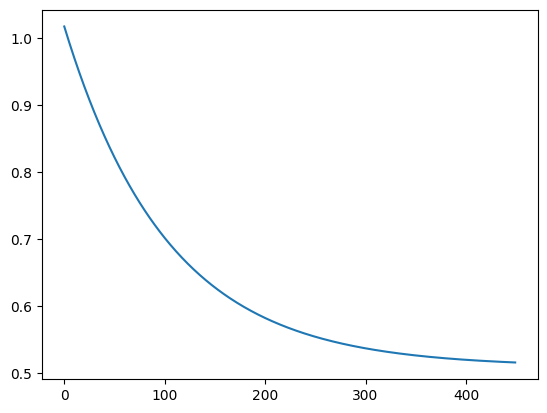

In [ ]:
plot(losses[50:])

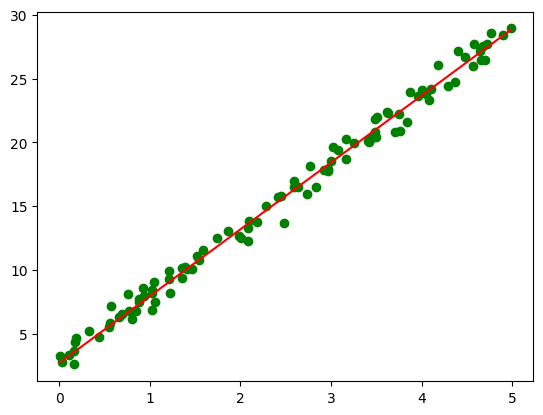

In [ ]:
x_test=torch.unsqueeze(torch.linspace(x.min(), x.max(), 100),1)
y_test=predict(x_text).detach().numpy()
plot(x_test, y_test, color='r')
scatter(x, y_obs, color='g')